In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

execluding courses: {'GEN120', 'MTH213', 'ENG145', 'FYE155', 'GEN185', 'GEN145', 'ENG140', 'GroupA', 'MTH281', 'ARA130', 'FYE120', 'GroupG', 'COM230', 'MKT210', 'FYE145', 'PSY363', 'MKT433', 'GroupD', 'HRM301', 'ENG240', 'MGT209', 'FYE105', 'FYE140', 'GEN220', 'OPR300', 'ARA345', 'FYE110', 'FYE125', 'FYE100', 'MTH215', 'FIN308', 'ANT261', 'ACC202', 'FYE150', 'HSS255', 'ISL135'}


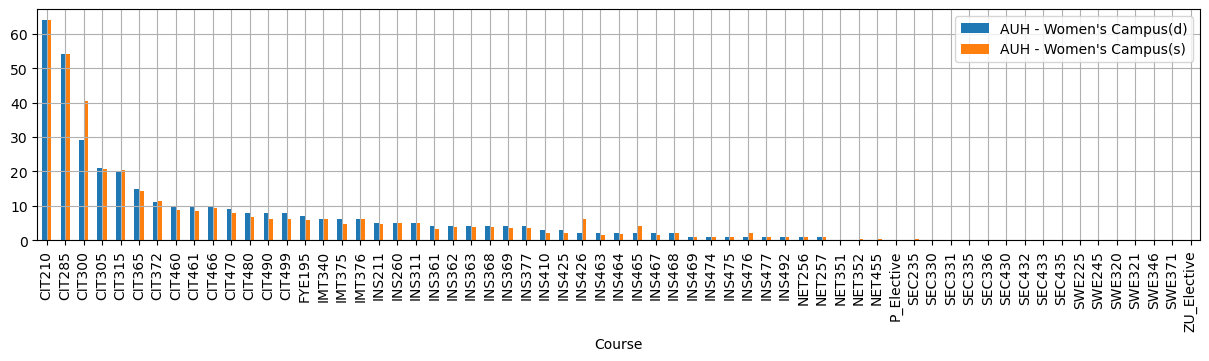

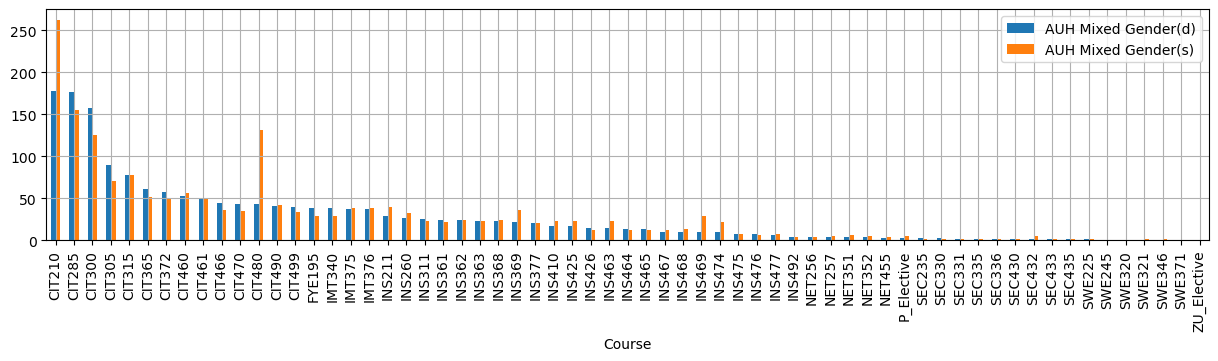

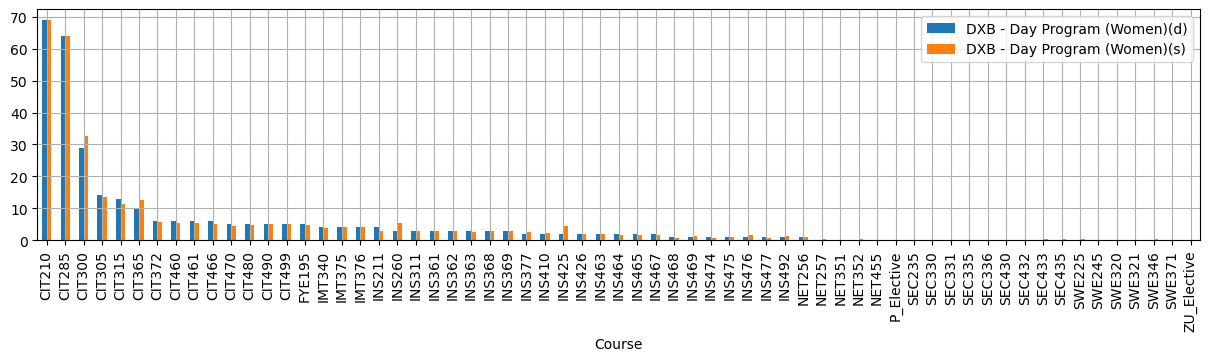

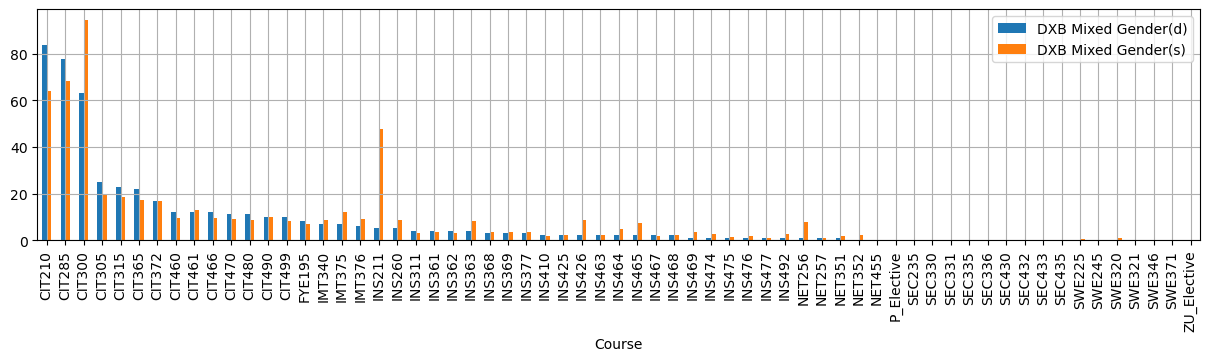

In [3]:
Forecast_files = {
                  'd': 'StudentsForecast_d_summary.xlsx',
                  's': 'StudentsForecast_s_summary.xlsx'
                }

data = []
for k, v in Forecast_files.items():
    data.append(pd.read_excel(v))
    data[-1].columns = [f'{c}({k})' for c in data[-1].columns]
    data[-1].rename(columns={f'Unnamed: 0({k})':'Course'}, inplace=True)

mask_text = 'CIT|INS|SEC|NET|SWE|IMT|FYE195|ZU_Elective|P_Elective'
for i, d in enumerate(data):
    if i == 0:
        df = d
    else:
        df = pd.merge(df, d, on='Course', how='outer')
print(f"execluding courses: {set(df[~df['Course'].str.contains(mask_text)]['Course'])}")
df = df[df['Course'].str.contains(mask_text)]

columns = []
for n,c in enumerate(data[-1].columns):
    if n==0: 
        continue
    tmp = ['Course']
    for d in data:
        tmp.append(d.columns[n])
    columns.append(tmp)  
        
# display(columns)
# display(df)

for n,x in enumerate(columns):
    if n==0: 
        continue
    ax = df.loc[:,x].sort_values(by=x[1], ascending=False).plot.bar(x=x[0], figsize=(15,3), rot=90)
    plt.xticks(np.arange(len(df.iloc[:,0])), df.iloc[:,0])
    plt.grid(True)
    plt.show()
        